In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/who-is-the-real-winner/sample_submission.csv
/kaggle/input/who-is-the-real-winner/train.csv
/kaggle/input/who-is-the-real-winner/test.csv


In [2]:
#The main idea of this code is to use the random forest model.
#We will first go through all the columns of the data.
#We will be encoding string datatypes into numerical ones in order to easily deal with them.
#We will be renaming any complex names present in the dataset

In [3]:
#Loads the data into the notebook
train_dat = pd.read_csv("/kaggle/input/who-is-the-real-winner/train.csv")
train_dat.columns

Index(['ID', 'Candidate', 'Constituency ∇', 'Party', 'Criminal Case',
       'Total Assets', 'Liabilities', 'state', 'Education'],
      dtype='object')

In [4]:
#We will rename the constituency column
# Null values
train_dat.isnull().sum()

ID                0
Candidate         0
Constituency ∇    0
Party             0
Criminal Case     0
Total Assets      0
Liabilities       0
state             0
Education         0
dtype: int64

In [5]:
#We will be goinh through all the individual columns for the datasets, and their datatypes.
#Will encode them as and when required.

In [6]:
#ID
train_dat['ID'].unique()

array([   0,    1,    2, ..., 2056, 2057, 2058])

In [7]:
train_dat['ID'].dtype

dtype('int64')

In [8]:
#Candidates
train_dat['Candidate'].unique()

array(['M.K. Mohan', 'Khatik Ramesh Prasad', 'Dr. Mantar Gowda', ...,
       'Dr. Manju Shiwach', 'Mansing Fattesingrao Naik', 'Nyato Rigia'],
      dtype=object)

In [9]:
train_dat['Candidate'].dtype

dtype('O')

In [10]:
#Constituencies
train_dat = train_dat.rename(columns={'Constituency ∇': 'Constituency'})

In [11]:
train_dat['Constituency'].unique()

array(['ANNA NAGAR', 'KARERA (SC)', 'MADIKERI', ..., 'MODI NAGAR',
       'SHIRALA', 'TALIHA'], dtype=object)

In [12]:
train_dat['Constituency'].dtype

dtype('O')

In [13]:
# Importing the LabelEncoder module from the scikit-learn library
from sklearn.preprocessing import LabelEncoder

# Extract the 'Constituency' column from the train_dat dataframe
data = train_dat['Constituency']

# Initialize a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder to the data and transform the categories into integers
encoded_data = label_encoder.fit_transform(data)

# Add 1 to each encoded value to ensure no encoded value is 0
encoded_data += 1

# Replace the original 'Constituency' column in train_dat with the encoded values
train_dat['Constituency'] = encoded_data

# Print the unique encoded values of the 'Constituency' column
print(train_dat['Constituency'].unique())


[  77  890 1105 ... 1219 1747 1862]


In [14]:
#Parties
train_dat['Party'].unique()

array(['DMK', 'BJP', 'INC', 'AITC', 'AAP', 'SP', 'NPP', 'BJD', 'IND',
       'SHS', 'RJD', 'YSRCP', 'AIADMK', 'CPI(M)', 'NCP', 'TDP', 'NDPP',
       'CPI', 'Sikkim Krantikari Morcha', 'JD(U)', 'JMM', 'JD(S)',
       'Tipra Motha Party'], dtype=object)

In [15]:
train_dat['Party'].dtype

dtype('O')

In [16]:
# Extracting the 'Party' column from the train_dat dataset
data = train_dat['Party']

# Using the label_encoder to transform the 'Party' column values into numerical labels, with adjustments
train_dat['Party'] = label_encoder.fit_transform(data) + 1

# Displaying the unique numerical labels generated after encoding the 'Party' column
print(train_dat['Party'].unique())


[ 8  5  9  3  1 19 16  4 10 18 17 23  2  7 14 21 15  6 20 12 13 11 22]


In [17]:
#Criminal Cases
train_dat['Criminal Case'].unique()

array([ 4,  0,  2,  1,  6,  3,  5,  7, 10, 12, 52, 29, 11,  9, 38,  8, 13,
       22, 14, 73, 27, 16, 25, 26, 18, 19, 87, 15, 23, 30, 17, 49, 24, 43,
       34])

In [18]:
train_dat['Criminal Case'].dtype

dtype('int64')

In [19]:
#Total assets
train_dat['Total Assets'].unique()

array(['211 Crore+', '1 Crore+', '7 Crore+', '9 Crore+', '2 Crore+',
       '3 Crore+', '5 Crore+', '22 Crore+', '0', '8 Crore+', '12 Crore+',
       '63 Crore+', '11 Lac+', '31 Crore+', '60 Lac+', '11 Crore+',
       '17 Crore+', '18 Lac+', '41 Crore+', '4 Crore+', '6 Crore+',
       '95 Lac+', '21 Crore+', '10 Crore+', '19 Crore+', '5 Lac+',
       '64 Crore+', '50 Lac+', '8 Lac+', '57 Lac+', '16 Lac+', '90 Lac+',
       '37 Lac+', '14 Crore+', '40 Crore+', '21 Lac+', '82 Lac+',
       '79 Lac+', '13 Crore+', '96 Lac+', '159 Crore+', '73 Thou+',
       '80 Crore+', '78 Lac+', '27 Crore+', '94 Lac+', '20 Crore+',
       '49 Lac+', '19 Lac+', '27 Lac+', '65 Crore+', '81 Crore+',
       '6 Lac+', '66 Lac+', '35 Crore+', '28 Lac+', '109 Crore+',
       '10 Lac+', '13 Lac+', '38 Lac+', '64 Lac+', '39 Lac+', '43 Lac+',
       '25 Crore+', '91 Lac+', '22 Lac+', '12 Lac+', '49 Crore+',
       '70 Lac+', '36 Lac+', '30 Crore+', '62 Lac+', '65 Lac+', '26 Lac+',
       '67 Lac+', '69 Crore+', '

In [20]:
train_dat['Total Assets'].dtype

dtype('O')

In [21]:
#This means that we need to convert the datatypes of the Total Assets
#This can also imply that the content of Liabilites is also similar to the above and 
#Will be dealt similarly.

In [22]:
#The liabilities in the data
train_dat['Liabilities'].unique()

array(['2 Crore+', '0', '22 Lac+', '24 Lac+', '61 Lac+', '29 Lac+',
       '35 Lac+', '10 Lac+', '1 Lac+', '15 Lac+', '73 Lac+', '5 Lac+',
       '6 Lac+', '1 Crore+', '4 Lac+', '42 Lac+', '4 Crore+', '3 Lac+',
       '18 Lac+', '17 Crore+', '39 Lac+', '26 Lac+', '8 Lac+', '3 Crore+',
       '7 Crore+', '9 Lac+', '28 Lac+', '14 Lac+', '37 Lac+', '47 Lac+',
       '6 Crore+', '23 Lac+', '90 Lac+', '7 Lac+', '53 Lac+', '75 Lac+',
       '44 Lac+', '60 Thou+', '21 Lac+', '55 Lac+', '17 Lac+', '2 Lac+',
       '49 Lac+', '91 Lac+', '11 Crore+', '16 Lac+', '89 Lac+', '12 Lac+',
       '62 Lac+', '34 Lac+', '37 Crore+', '15 Crore+', '20 Lac+',
       '70 Lac+', '61 Thou+', '32 Lac+', '50 Lac+', '48 Lac+',
       '43 Crore+', '5 Crore+', '31 Lac+', '30 Lac+', '11 Lac+',
       '80 Lac+', '46 Lac+', '60 Lac+', '9 Crore+', '9 Hund+', '30 Thou+',
       '99 Lac+', '46 Thou+', '59 Lac+', '22 Crore+', '95 Lac+',
       '13 Lac+', '96 Lac+', '27 Lac+', '36 Crore+', '19 Lac+', '57 Lac+',
       '82 

In [23]:
train_dat['Liabilities'].dtype

dtype('O')

In [24]:
#Data conversion for Total Assets and Liabilites
def numero_uno_conv(value):
    value = str(value)
    if value.endswith('Crore+'):
        return float(value.replace(' Crore+', '')) * 10000000
    elif value.endswith('Crore'):
        return float(value.replace(' Crore', '')) * 10000000
    elif value.endswith('Lac+'):
        return float(value.replace(' Lac+', '')) * 100000
    elif value.endswith('Lac'):
        return float(value.replace(' Lac', '')) * 100000
    elif value.endswith('Thou+'):
        return float(value.replace(' Thou+', '')) * 1000
    elif value.endswith('Thou'):
        return float(value.replace(' Thou', '')) * 1000
    elif value.endswith('Hund+'):
        return float(value.replace(' Hund+', '')) * 100
    elif value.endswith('Hund'):
        return float(value.replace(' Hund', '')) * 100
    else:
        return float(value.replace('+', ''))

In [25]:
dat_1 = train_dat['Total Assets']
train_dat['Total Assets'] = [numero_uno_conv(value) for value in dat_1]
dat_2 = train_dat['Liabilities']
train_dat['Liabilities'] = [numero_uno_conv(value) for value in dat_2]

In [26]:
train_dat['Total Assets'].dtype

dtype('float64')

In [27]:
train_dat['Liabilities'].dtype

dtype('float64')

In [28]:
#We can see the presence of nill values in the dataset
train_dat.isnull().sum()

ID               0
Candidate        0
Constituency     0
Party            0
Criminal Case    0
Total Assets     0
Liabilities      0
state            0
Education        0
dtype: int64

In [29]:
#States
train_dat['state'].unique()

array(['TAMIL NADU', 'MADHYA PRADESH', 'KARNATAKA', 'BIHAR',
       'WEST BENGAL', 'UTTAR PRADESH', 'PUNJAB', 'MAHARASHTRA', 'ODISHA',
       'HIMACHAL PRADESH', 'MEGHALAYA', 'KERALA', 'HARYANA', 'DELHI',
       'ANDHRA PRADESH', 'MANIPUR', 'RAJASTHAN', 'ASSAM',
       'ARUNACHAL PRADESH', 'JHARKHAND', 'GUJARAT', 'TRIPURA',
       'CHHATTISGARH', 'UTTARAKHAND', 'NAGALAND', 'SIKKIM', 'GOA',
       'PUDUCHERRY'], dtype=object)

In [30]:
train_dat['state'].dtype

dtype('O')

In [31]:
# Extracting the 'state' column from the train_dat dataset
data = train_dat['state']

# Initializing a LabelEncoder instance
label_encoder = LabelEncoder()

# Encoding the 'state' column values using the label_encoder, with adjustments
train_dat['state'] = label_encoder.fit_transform(data) + 1

# Displaying the unique encoded values of the 'state' column
print(train_dat['state'].unique())


[24 14 12  4 28 26 21 15 19 10 17 13  9  6  1 16 22  3  2 11  8 25  5 27
 18 23  7 20]


In [32]:
#Education
train_dat['Education'].unique()

array(['8th Pass', '12th Pass', 'Post Graduate', 'Graduate Professional',
       'Graduate', '10th Pass', 'Others', 'Doctorate', 'Literate',
       '5th Pass'], dtype=object)

In [33]:
train_dat['Education'].dtype

dtype('O')

In [34]:
#We will be encoding Total Assets

# Extracting the 'Total Assets' column from the train_dat DataFrame
data = train_dat['Total Assets']

# Initializing a LabelEncoder object
label_encoder = LabelEncoder()

# Encoding the 'Total Assets' column values using the label_encoder, with adjustments
train_dat['Total Assets'] = label_encoder.fit_transform(data) + 1

# Displaying the unique numerical labels generated after encoding the 'Total Assets' column
print(train_dat['Total Assets'].unique())

[199 104 110 112 105 106 108 125   1 111 115 161  18 134  65 114 120  25
 144 107 109  99 124 113 122  13 162  55  15  62  23  94  43 117 143  28
  86  83 116 100 193   8 174  82 130  98 123  54  26  34 163 175  14  71
 138  35 182  17  20  44  69  45  49 128  95  29  19 151  74  42 133  67
  70  33  72 167  46   2   9  80 147 119  68 132 153  92 197 126 142 192
 121 136  61 201 102  97 203 140  38 129  21 118 103  96 135  32  73  41
  36  22  58 188  31  93 146 164  66   3  51  63  12 168 154 191  48 178
  16 149 145 183 158 189   6  39 206 208 185 148 131 141 198 152  60 166
  53 190 170  56  88  87 127  37  75  27  57  11 156 169 173  85 159 196
  79 150  59 187  40  64 172 101  91 202 137  30 210 157 139 180  89 209
 171   4  10  81 165  47  52  90  24  77  50 205 186   7 155  76  84 184
 176   5 200 179 181 195 160 177 194 207  78 204]


In [35]:
#Same for liabilities

# Extracting the 'Total Assets' column from the train_dat DataFrame
data = train_dat['Liabilities']

# Initializing a LabelEncoder object
label_encoder = LabelEncoder()

# Encoding the 'Total Assets' column values using the label_encoder, with adjustments
train_dat['Liabilities'] = label_encoder.fit_transform(data) + 1

# Displaying the unique numerical labels generated after encoding the 'Total Assets' column
print(train_dat['Liabilities'].unique())


[127   1  52  54  91  59  65  40  31  45 102  35  36 126  34  72 129  33
  48 142  69  56  38 128 132  39  58  44  67  77 131  53 118  37  83 104
  74  21  51  85  47  32  79 119 136  46 117  42  92  64 158 140  50  99
  22  62  80  78 161 130  61  60  41 109  76  90 134   3  11 125  18  89
 147 122  43 123  57 157  49  87 111 121  63  68  95 149  73 133 135 110
  66  75 143 101 166 103  84  20 107 138   6  70 112  93 146  82  10 155
 141 144  30  98 105 165 148  71  94 159 163 114   4 124  27 139 150  28
 154  81 137 145  55 169 160 153 113  86  88  26  96 100 168   8  14 162
  97   2  15 167 116 106 170  24 115   7 108 152   9 120  29  23  25 164
  12 151   5 156  13  19  17  16]


In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [37]:
#Now, we have read the training data, now is the time we repeat the steps with the test data.

In [38]:
test_dat = pd.read_csv("/kaggle/input/who-is-the-real-winner/test.csv")

In [39]:
test_dat.columns

Index(['ID', 'Candidate', 'Constituency ∇', 'Party', 'Criminal Case',
       'Total Assets', 'Liabilities', 'state'],
      dtype='object')

In [40]:
#The objects are similar to that of the training dataset, so lets do the same with the test dataset.
#We won't be testing the dataset and inspecting the data, but simply convert to the required type and 
#Encode the data as and when required.

In [41]:
#Constituency
test_dat = test_dat.rename(columns={'Constituency ∇': 'Constituency'})

In [42]:
# Extract the 'Constituency' column from the train_dat dataframe
data = test_dat['Constituency']

# Initialize a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder to the data and transform the categories into integers
encoded_data = label_encoder.fit_transform(data)

# Add 1 to each encoded value to ensure no encoded value is 0
encoded_data += 1

# Replace the original 'Constituency' column in train_dat with the encoded values
test_dat['Constituency'] = encoded_data

# Print the unique encoded values of the 'Constituency' column
print(test_dat['Constituency'].unique())

[ 835 1191 1311 ...  958  774  222]


In [43]:
# Extracting the 'Party' column from the train_dat dataset
data = test_dat['Party']

# Using the label_encoder to transform the 'Party' column values into numerical labels, with adjustments
test_dat['Party'] = label_encoder.fit_transform(data) + 1

# Displaying the unique numerical labels generated after encoding the 'Party' column
print(test_dat['Party'].unique())


[10  3 14 19  5  4  2 18  8  9  1 12  7 23 17 13 16 15 20 22 21 11  6]


In [44]:
#Conversion of the Assets and Liabilities into the numerical values
data1 = test_dat['Total Assets']
test_dat['Total Assets'] = [numero_uno_conv(value) for value in data1]
data2 = test_dat['Liabilities']
test_dat['Liabilities'] = [numero_uno_conv(value) for value in data2]

In [45]:
# Extracting the 'state' column from the train_dat dataset
data = test_dat['state']

# Initializing a LabelEncoder instance
label_encoder = LabelEncoder()

# Encoding the 'state' column values using the label_encoder, with adjustments
test_dat['state'] = label_encoder.fit_transform(data) + 1

# Displaying the unique encoded values of the 'state' column
print(test_dat['state'].unique())


[15 28 26  2 22 19  8 24 10 14 11 27 21  5  6 12 18 13  1  4 16  3  9 25
 17  7 23 20]


In [46]:
#Ranging to the total assets first and verify it.
#test_dat['Total Assets'] = [assign_range(val) for val in test_dat['Total Assets']]
test_dat['Total Assets'].unique()

array([7.000e+08, 2.000e+07, 4.900e+08, 1.600e+08, 3.000e+07, 6.000e+07,
       7.000e+07, 4.000e+06, 1.000e+07, 2.500e+06, 2.500e+08, 5.000e+07,
       0.000e+00, 5.000e+06, 3.700e+08, 8.000e+07, 2.700e+06, 1.000e+08,
       8.500e+06, 7.700e+06, 2.000e+08, 9.000e+07, 4.000e+07, 1.100e+08,
       7.900e+06, 3.400e+06, 1.700e+08, 1.300e+08, 5.800e+06, 3.900e+06,
       4.900e+06, 3.400e+08, 8.800e+08, 5.300e+06, 1.500e+08, 1.400e+06,
       9.500e+08, 5.900e+06, 4.000e+08, 1.400e+08, 6.700e+06, 5.800e+08,
       6.600e+06, 1.600e+06, 3.700e+06, 5.000e+08, 8.900e+06, 4.000e+05,
       1.900e+08, 1.200e+08, 1.900e+06, 3.000e+06, 4.300e+06, 6.400e+06,
       1.750e+09, 5.200e+06, 9.100e+06, 3.300e+06, 9.400e+06, 4.400e+08,
       7.600e+06, 1.800e+08, 1.020e+09, 4.200e+08, 2.900e+08, 2.300e+08,
       4.700e+08, 2.100e+08, 2.800e+08, 8.200e+06, 4.600e+06, 4.500e+06,
       8.300e+06, 7.100e+08, 1.000e+06, 1.300e+06, 4.800e+08, 6.100e+08,
       2.200e+08, 3.000e+05, 6.000e+06, 9.700e+08, 

In [47]:
#Ranging to the total assets first and verify it.
#test_dat['Liabilities'] = [assign_range(val) for val in test_dat['Liabilities']]
test_dat['Liabilities'].unique()

array([1.10e+08, 1.30e+06, 1.00e+07, 0.00e+00, 2.00e+07, 8.70e+06,
       6.30e+06, 1.60e+06, 2.80e+06, 3.90e+06, 9.00e+05, 7.40e+06,
       4.20e+06, 1.20e+06, 3.20e+06, 3.10e+06, 5.00e+07, 3.40e+06,
       7.80e+06, 1.40e+06, 6.00e+05, 4.00e+07, 2.00e+06, 1.90e+06,
       3.00e+06, 1.00e+06, 8.00e+05, 3.00e+05, 2.50e+06, 2.90e+06,
       5.70e+06, 1.00e+05, 5.50e+06, 1.50e+06, 2.00e+05, 2.40e+06,
       2.10e+06, 3.10e+08, 3.00e+07, 1.60e+08, 6.00e+07, 7.00e+05,
       9.00e+07, 4.00e+06, 8.00e+07, 4.00e+05, 1.40e+08, 1.80e+06,
       6.40e+06, 4.10e+06, 9.80e+04, 2.20e+06, 5.10e+06, 9.80e+06,
       4.70e+06, 4.50e+06, 4.70e+08, 9.00e+06, 4.30e+06, 5.00e+05,
       2.30e+06, 1.20e+08, 5.40e+06, 1.10e+06, 2.70e+06, 4.80e+06,
       1.70e+06, 8.00e+06, 3.80e+06, 4.40e+06, 2.00e+08, 9.40e+06,
       1.20e+04, 7.10e+06, 3.90e+08, 8.10e+06, 6.10e+06, 6.20e+06,
       2.60e+06, 6.90e+06, 5.20e+06, 7.00e+07, 1.70e+08, 9.90e+06,
       3.50e+04, 8.80e+06, 5.80e+06, 9.70e+06, 1.21e+09, 9.60e

In [48]:
#We will be encoding Total Assets

# Extracting the 'Total Assets' column from the train_dat DataFrame
data = test_dat['Total Assets']

# Initializing a LabelEncoder object
label_encoder = LabelEncoder()

# Encoding the 'Total Assets' column values using the label_encoder, with adjustments
test_dat['Total Assets'] = label_encoder.fit_transform(data) + 1

# Displaying the unique numerical labels generated after encoding the 'Total Assets' column
print(test_dat['Total Assets'].unique())

[146  91 133 105  92  95  96  37  90  24 114  94   1  47 124  97  26  99
  78  71 109  98  93 100  73  31 106 102  54  36  46 122 153  50 104  13
 155  55 126 103  62 141  61  15  34 134  81   8 108 101  18  27  40  59
 166  49  83  30  85 128  70 107 157 127 118 112 131 110 117  75  43  42
  76 147  10  12 132 142 111   7  56 156 151  65  11 116  32 135  22 159
 130  14  63 139   3  51  64  48  23  33  28  88  53  38  77  74 120 174
  67   2 115  58 125 152 138  44  25  60  29 136  79 123  80  52  16  41
  82 177 168  86  72  39  17 163  87 150  84 165 119 173 161   4 162  35
 121 169 149  19 113 167 158 164  66   9 160   5 148 143 140 172 171  57
 170  89   6 137 129  21  45 144 145  69 176  20 175 154  68]


In [49]:
#Same for liabilities

# Extracting the 'Total Assets' column from the train_dat DataFrame
data = test_dat['Liabilities']

# Initializing a LabelEncoder object
label_encoder = LabelEncoder()

# Encoding the 'Total Assets' column values using the label_encoder, with adjustments
test_dat['Liabilities'] = label_encoder.fit_transform(data) + 1

# Displaying the unique numerical labels generated after encoding the 'Total Assets' column
print(test_dat['Liabilities'].unique())


[128  33 118   1 119 106  83  36  48  59  29  93  62  32  52  51 122  54
  97  34  26 121  40  39  50  30  28  23  45  49  77  21  75  35  22  44
  41 144 120 132 123  27 126  60 125  24 131  38  84  61  19  42  71 116
  67  65 149 109  63  25  43 129  74  31  47  68  37  99  58  64 136 112
   2  91 148 100  81  82  46  89  72 124 133 117   7 107  78 115 159 114
  53  70  56   9 147  92   4  85  18  79  55  11  73  57 146  80 103 102
 130 162  69 137   8 111 138  95  76 127  90 161 150  86 113 151   3   5
 155 158  98  12 105  20 101 154 142  10 152  94 143 135  66  87 141 134
 156 104  17 139  88 145  96  15 110   6  16  13 140 153  14 160 157 108]


In [50]:
#Now, we will start the plotting and prediction
test = test_dat.drop(['ID', 'Candidate', 'Constituency'], axis=1)

In [51]:
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import train_test_split


X = train_dat.drop(['Education','ID', 'Candidate', 'Constituency'], axis=1)  
y = train_dat['Education']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

rf_class = RandomForestClassifier(n_estimators=300, min_samples_leaf = 2, min_samples_split = 5, random_state=100)  

rf_class.fit(X, y)

y_pred = rf_class.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100, "%")

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 score on test set:", f1)

Accuracy: 87.62135922330097 %
F1 score on test set: 0.8716602113686714


In [52]:
y_pred = rf_class.predict(test)

In [53]:
result = pd.DataFrame(y_pred)

In [54]:
result.columns = ['Education']

In [55]:
submission = pd.DataFrame(test_dat['ID'])

In [56]:
submission['Education'] =  result['Education']
submission.reset_index(drop=True , inplace=True)

In [57]:
submission.to_csv('/kaggle/working/submission.csv', index= False)

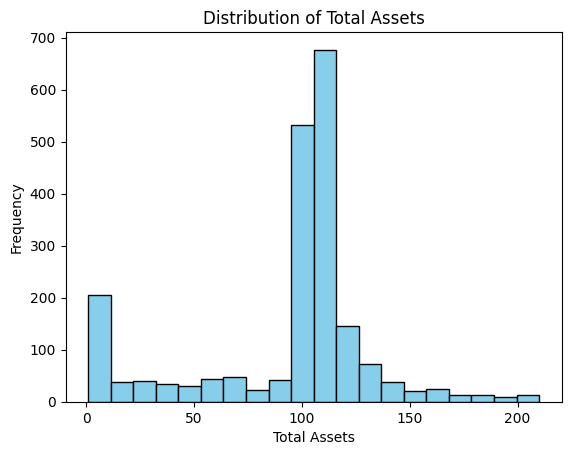

In [58]:
import matplotlib.pyplot as plt

# Plot histogram for Total Assets
plt.hist(train_dat['Total Assets'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Assets')
plt.xlabel('Total Assets')
plt.ylabel('Frequency')
plt.show()

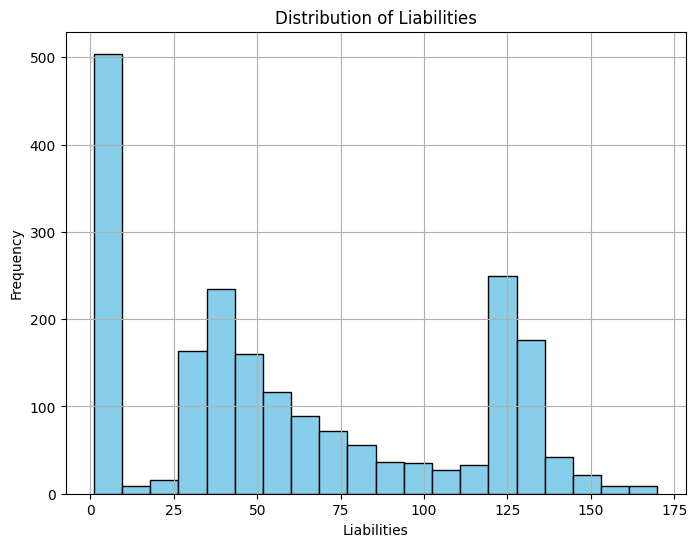

In [59]:
import matplotlib.pyplot as plt

# Plot histogram for Liabilities
plt.figure(figsize=(8, 6))
plt.hist(train_dat['Liabilities'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Liabilities')
plt.xlabel('Liabilities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


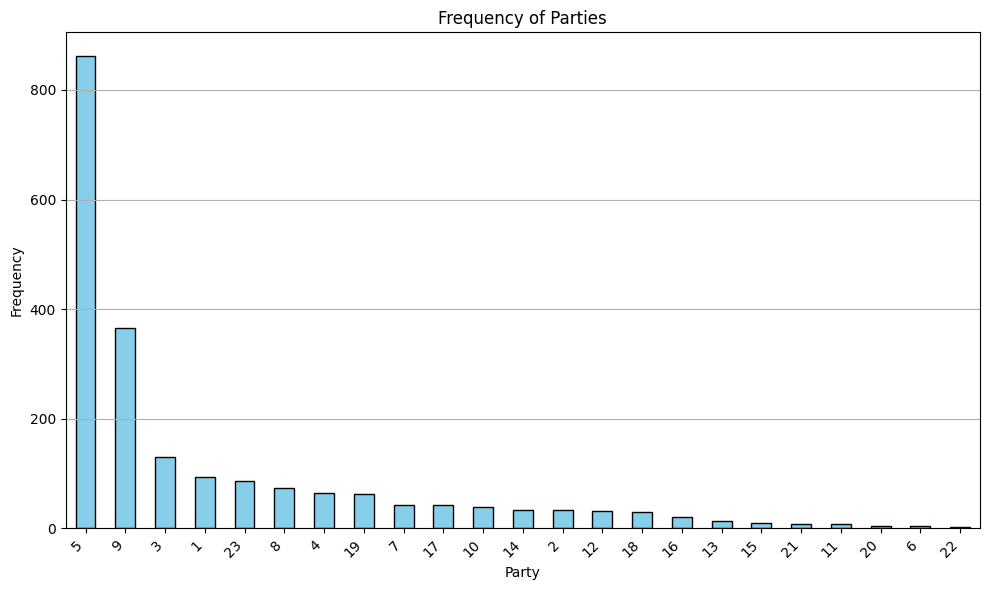

In [60]:
import matplotlib.pyplot as plt

# Count the frequency of each party
party_counts = train_dat['Party'].value_counts()

# Plot bar plot for Party
plt.figure(figsize=(10, 6))
party_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Parties')
plt.xlabel('Party')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


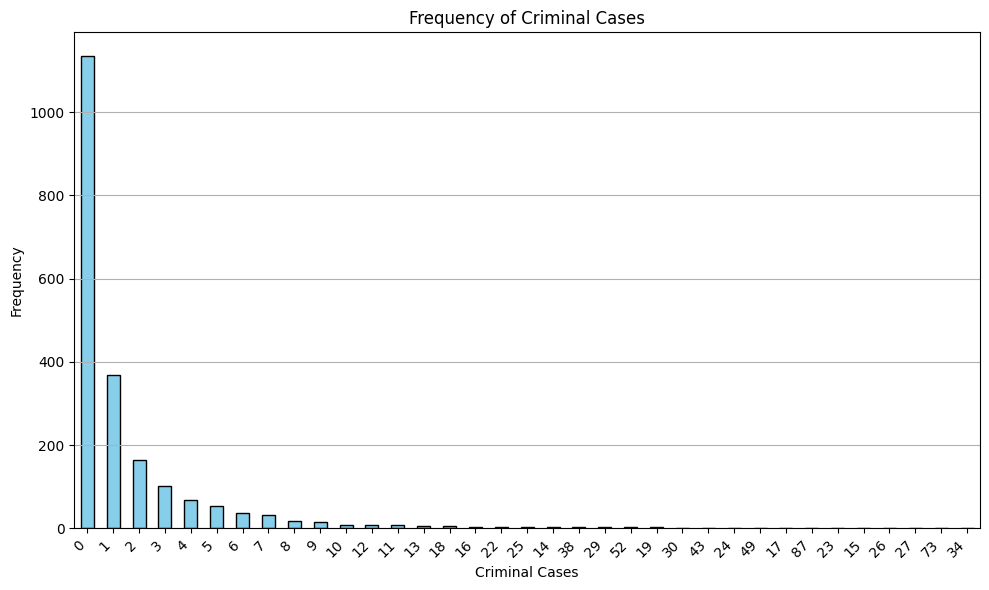

In [61]:
import matplotlib.pyplot as plt

# Count the frequency of each value in 'Criminal Cases'
criminal_cases_counts = train_dat['Criminal Case'].value_counts()

# Plot bar plot for Criminal Cases
plt.figure(figsize=(10, 6))
criminal_cases_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Criminal Cases')
plt.xlabel('Criminal Cases')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


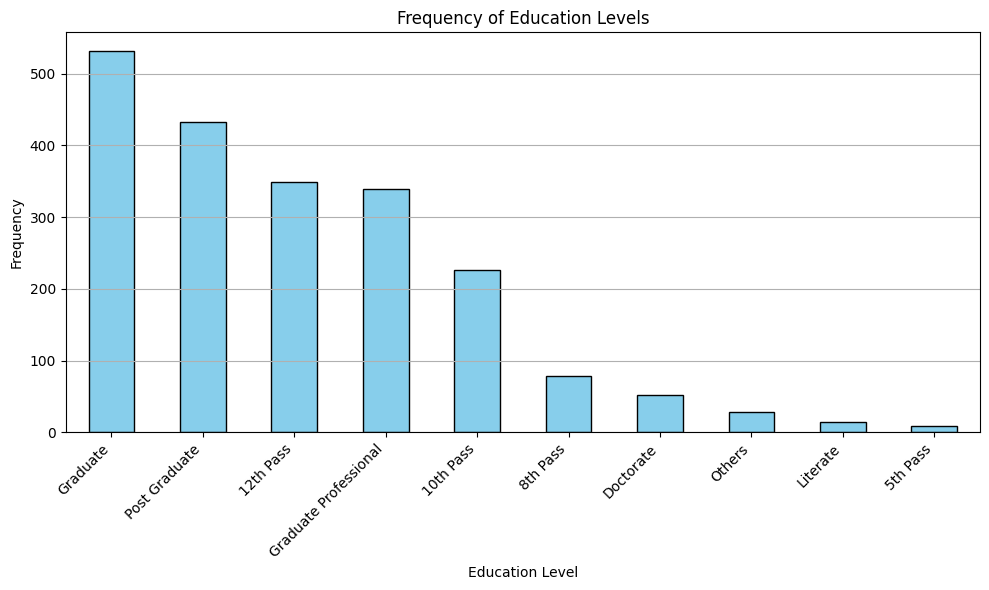

In [62]:
import matplotlib.pyplot as plt

# Count the frequency of each value in 'Education'
education_counts = train_dat['Education'].value_counts()

# Plot bar plot for Education
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()



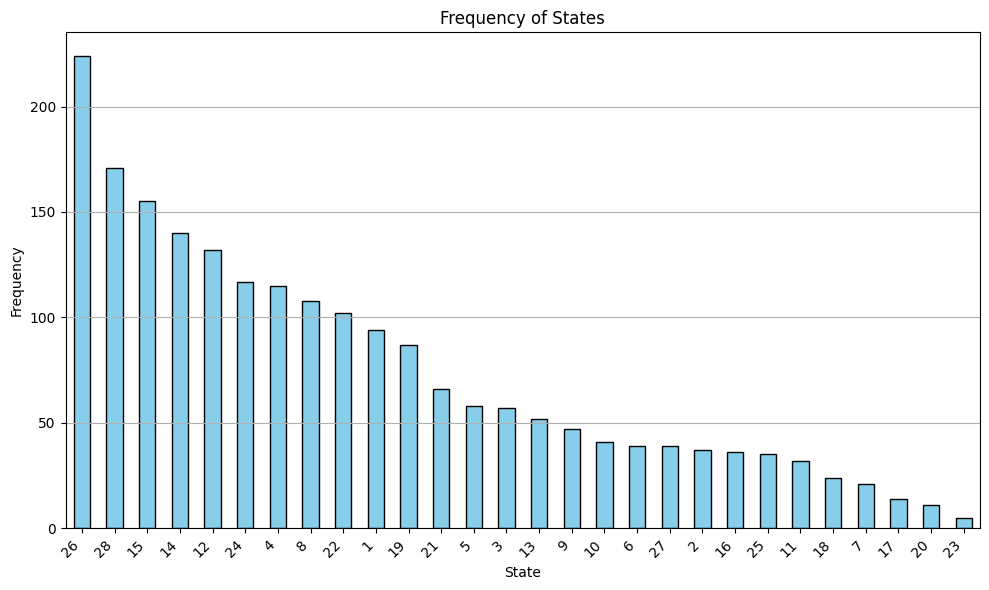

In [63]:
import matplotlib.pyplot as plt

# Count the frequency of each value in 'state'
state_counts = train_dat['state'].value_counts()

# Plot bar plot for state
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of States')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
